# Exothermic Batch Reactor

## Details

Rajas Mehendale (18CHE160)

In [58]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
from scipy.integrate import odeint

from IPython.display import display, Math

%config InlineBackend.figure_format = 'svg'

style.use("classic")

## Data


$\rho = 1000 \ \ (\frac{kg}{m^3})$

${C}_{p} = 0.96 \ \ (\frac{kcal}{kg-K})$

k (at 298K) = 0.002 ${min}^{-1}$

A = 15${m}^{2}$

U = 600 $\frac{kcal}{hr - {m}^{2} - K}$

Initial Conditions: at $t=0: {C}_{Ai} = 2 \ \ (\frac{kmol}{{m}^{3}})$

${T}_{i} = 298 K$

${V}_{reactor} = 10{m}^{3}$



## Reaction Details


The reaction is exothermic

A batch reactor is used to process this reactant A

Reaction is of the form $A \ \ \rightarrow \ \ Products$


In [59]:
rho = 1000  # kg/m3
Cp = (0.96) # J/kmol/K
k = 0.002 #min^-1
Tc = 298 #K
V = 10 #m3
U = 600/60 #kcal/(min-m2-K)
A = 15 #m2
E_by_R = 10000 #K
ua_by_v = U*A/V # J/(sec-m3-K)
zeta = U*A/V/(rho*Cp)

In [60]:
ko = k/np.exp(-E_by_R/298)
ca_i = 2 #kmol/m3
Ti = 298 #K


## Equations



The mass and energy balance equations yield

$$\frac{{dX}_{A}}{dt} = k_o * exp(\frac{-E}{R \ \ * T_i + \Theta * {(\Delta T )}_{max}})* (1 - {X}_{A})$$

and

$$\frac{d \Theta}{dt} = k_o * exp(\frac{-E}{R \ \ * T_i + \Theta * {(\Delta T )}_{max}})* (1 - {X}_{A}) - (\frac{U*A}{V* \rho * C_p}) * (\Theta + \alpha)$$


where $\Theta = (\frac{T - T_i}{{(\Delta T )}_{max}})$

and $\alpha = (\frac{T_i - T_c}{{(\Delta T )}_{max}})$


## Defining the ODEs

In [61]:
def reactor_solver(del_h_r_given):
    del_h_r = del_h_r_given*1000 # kcal/kmol
    del_t_max = ca_i * (-del_h_r)/(rho*Cp)
    alpha = (Ti-Tc)/del_t_max


    def balances(x, t):
    # We define the ODEs here
        [Xa,theta] = x
    
    
        dXadt = ko*np.exp( -E_by_R/ (Ti + theta*del_t_max) )*(1-Xa)
        dthetadt = ko*np.exp( -E_by_R/ (Ti + theta*del_t_max) )*(1-Xa) - zeta *(theta+alpha)

        return [dXadt,dthetadt]
    # Defining time arrays
    t_0 = np.linspace(0,180, 5000)

    # soln =[Xa,theta]
    x0 = [0,0]
    soln_0 = odeint(balances, x0, t_0)
    return [t_0, soln_0]
    

In [62]:
def plot_sol(t, sol,del_h_r_given):
    fig = plt.figure(facecolor="white")
    plt.suptitle(r"$\Delta H_r = %.1f (\frac{kcal}{gmol})$" % del_h_r_given, fontsize=18)
    plt.grid()
    plt.plot(t, sol[:, 0], label=r'$X_A$', color='r', linewidth=1.5)
    plt.plot(t, sol[:, 1], label=r'$\Theta $', color='b', linewidth=1.5)
    plt.xlabel("Time (min)")
    plt.ylabel(r"Conversion $(X_A)$ , Temperature $\Theta$")
    plt.ylim([0,1])
    plt.legend(loc="best")

## Solving ODEs and plotting for various cases

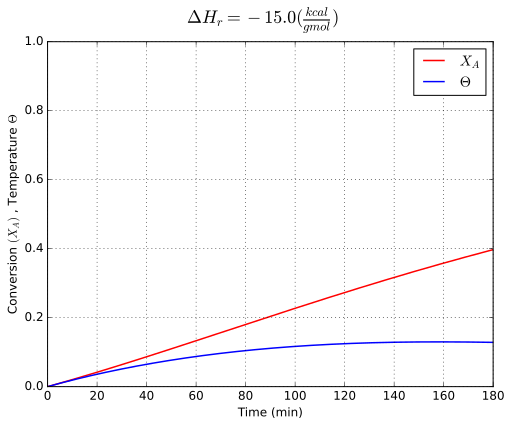

In [63]:
del_h_r_given = -15
[t_0, soln_0] =reactor_solver(del_h_r_given)
plot_sol(t_0, soln_0,del_h_r_given)

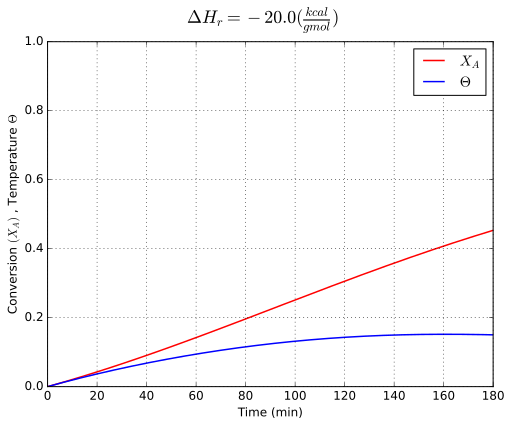

In [64]:
del_h_r_given = -20
[t_0, soln_0] =reactor_solver(del_h_r_given)
plot_sol(t_0, soln_0,del_h_r_given)

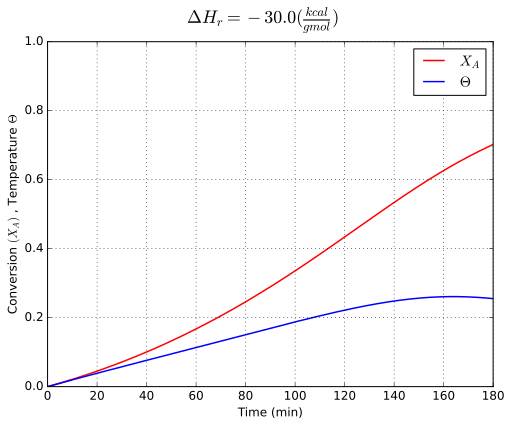

In [65]:
del_h_r_given = -30
[t_0, soln_0] =reactor_solver(del_h_r_given)
plot_sol(t_0, soln_0,del_h_r_given)

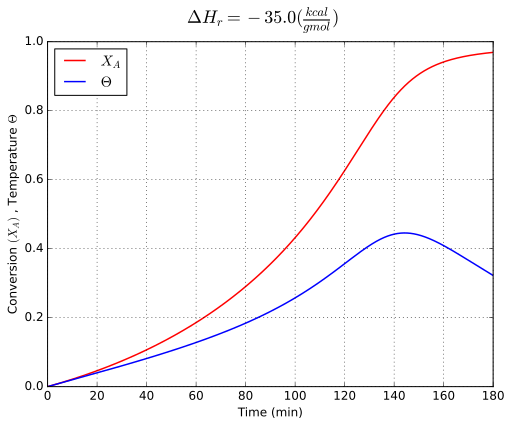

In [66]:
del_h_r_given = -35
[t_0, soln_0] =reactor_solver(del_h_r_given)
plot_sol(t_0, soln_0,del_h_r_given)

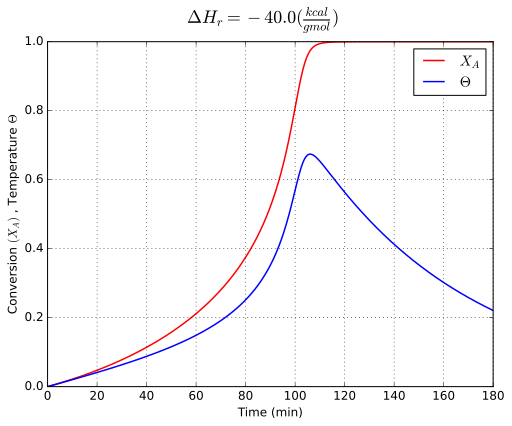

In [67]:
del_h_r_given = -40
[t_0, soln_0] =reactor_solver(del_h_r_given)
plot_sol(t_0, soln_0,del_h_r_given)

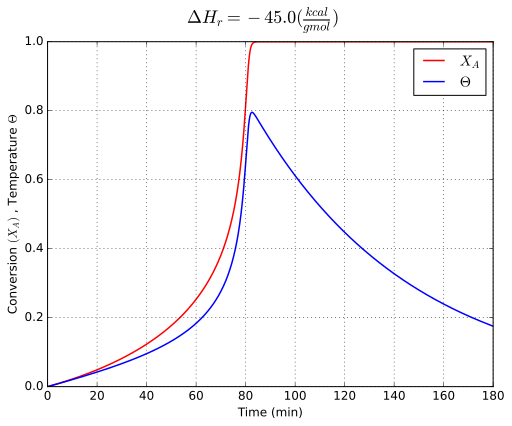

In [68]:
del_h_r_given = -45
[t_0, soln_0] =reactor_solver(del_h_r_given)
plot_sol(t_0, soln_0,del_h_r_given)